<a href="https://colab.research.google.com/github/stevengregori92/Implementation-of-Learning-KNN-part-3/blob/main/Implementation_of_Learning_KNN_part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install luwiji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from luwiji.knn import illustration, demo

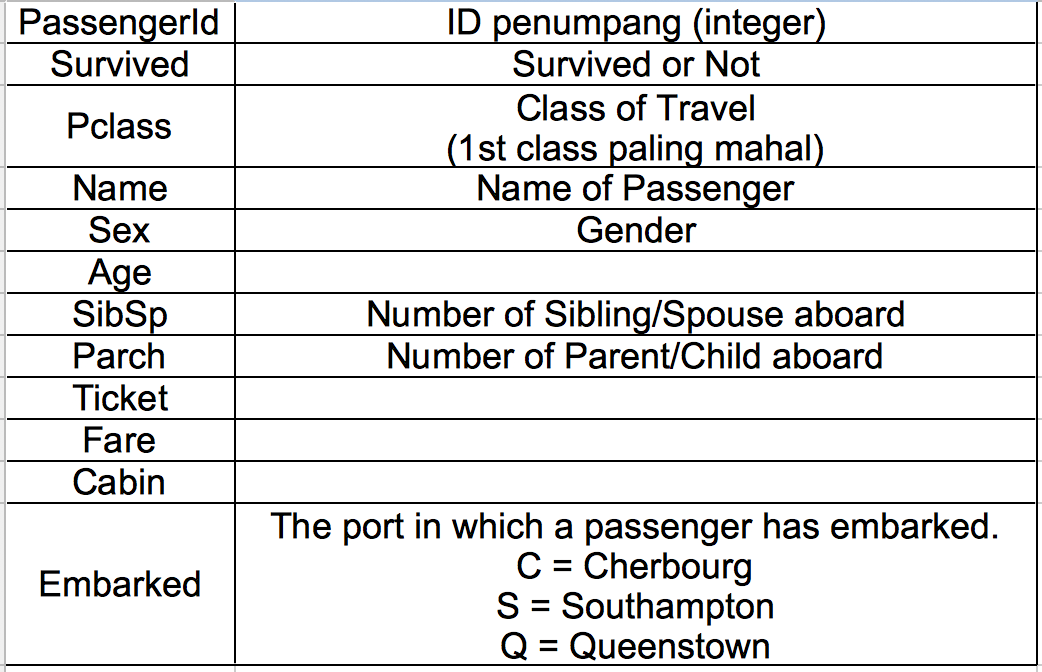

In [ ]:
illustration.nomenklatur

In [ ]:
data = pd.read_csv('titanic.csv', index_col = 'PassengerId')
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
data.drop(columns = ['Name', 'Ticket'], inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


#Cleaning Data

In [ ]:
from jcopml.plot import plot_missing_value

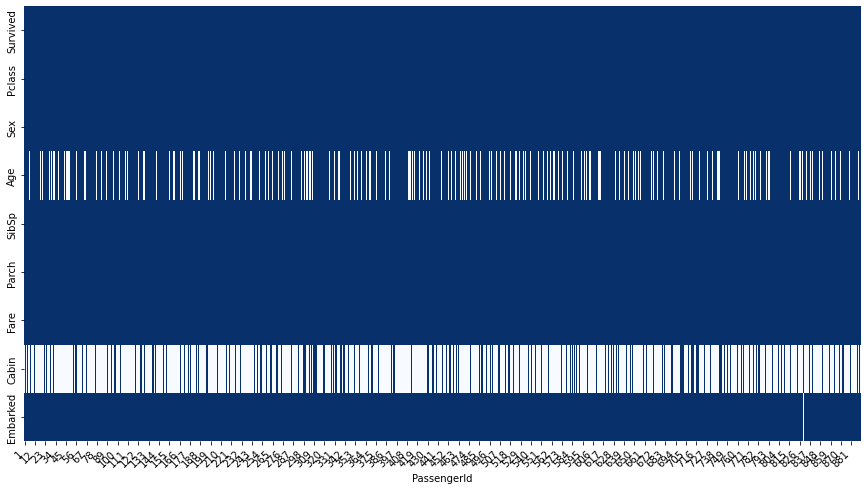

In [ ]:
plot_missing_value(data)

In [ ]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
data.drop(columns = ['Age', 'Cabin'], inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 88.0+ KB


In [ ]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
data.fillna({'Embarked':'S'}, inplace = True)

In [ ]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#Data Preparation

In [ ]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,7.2500,S
2,1,1,female,1,0,71.2833,C
3,1,3,female,0,0,7.9250,S
4,1,1,female,1,0,53.1000,S
5,0,3,male,0,0,8.0500,S


In [ ]:
X = data.drop(columns=['Survived'])
y = data.Survived

X = pd.get_dummies(X, columns = ['Pclass', 'Sex', 'Embarked'])

#Run the Model with Cross Validation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X = data.drop(columns=['Survived'])
y = data.Survived

X = pd.get_dummies(X, columns = ['Pclass', 'Sex', 'Embarked'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42)

#Improvement from model

Tuning n_neighbor without scaling

Max test score: 0.7932960893854749
n_neighbor: 5


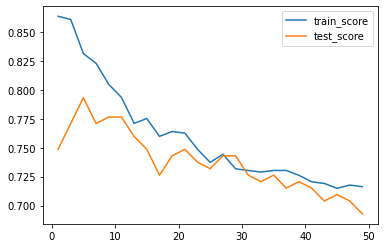

In [ ]:
neighbor = range(1, 51, 2)

train_score = []
test_score = []

for k in neighbor:
  kn = KNeighborsClassifier(n_neighbors = k)
  kn.fit(X_train, y_train)

  train_score.append(kn.score(X_train, y_train))
  test_score.append(kn.score(X_test, y_test))

plt.plot(neighbor, train_score, label = 'train_score')
plt.plot(neighbor, test_score, label = 'test_score')
plt.legend()

print(f'Max test score: {np.max(test_score)}')
print(f'n_neighbor: {neighbor[np.argmax(test_score)]}')

Tuning n_neighbors with scaling

In [ ]:
stand = MinMaxScaler().fit(X_train)
X_train_stand = stand.transform(X_train)
X_test_stand = stand.transform(X_test)

Max test score: 0.7988826815642458
n_neighbor: 27


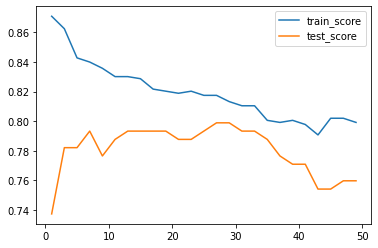

In [ ]:
neighbor = range(1, 51, 2)

train_score = []
test_score = []

for k in neighbor:
  kn = KNeighborsClassifier(n_neighbors = k)
  kn.fit(X_train_stand, y_train)

  train_score.append(kn.score(X_train_stand, y_train))
  test_score.append(kn.score(X_test_stand, y_test))

plt.plot(neighbor, train_score, label = 'train_score')
plt.plot(neighbor, test_score, label = 'test_score')
plt.legend()

print(f'Max test score: {np.max(test_score)}')
print(f'n_neighbor: {neighbor[np.argmax(test_score)]}')

Tuning n_neighbors with weight by distance

Max test score: 0.8100558659217877
n_neighbor: 7


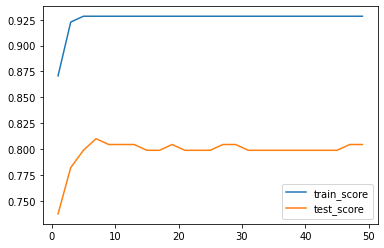

In [ ]:
neighbor = range(1, 51, 2)

train_score = []
test_score = []

for k in neighbor:
  kn = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
  kn.fit(X_train_stand, y_train)

  train_score.append(kn.score(X_train_stand, y_train))
  test_score.append(kn.score(X_test_stand, y_test))

plt.plot(neighbor, train_score, label = 'train_score')
plt.plot(neighbor, test_score, label = 'test_score')
plt.legend()

print(f'Max test score: {np.max(test_score)}')
print(f'n_neighbor: {neighbor[np.argmax(test_score)]}')

Tuning n_neighbors with Manhattan Distance

Max test score: 0.8100558659217877
n_neighbor: 7


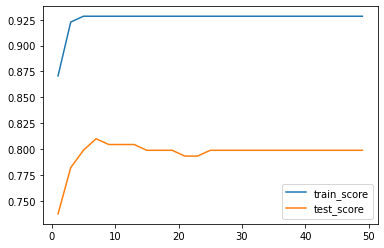

In [ ]:
neighbor = range(1, 51, 2)

train_score = []
test_score = []

for k in neighbor:
  kn = KNeighborsClassifier(n_neighbors = k, weights = 'distance', p=1)
  kn.fit(X_train_stand, y_train)

  train_score.append(kn.score(X_train_stand, y_train))
  test_score.append(kn.score(X_test_stand, y_test))

plt.plot(neighbor, train_score, label = 'train_score')
plt.plot(neighbor, test_score, label = 'test_score')
plt.legend()

print(f'Max test score: {np.max(test_score)}')
print(f'n_neighbor: {neighbor[np.argmax(test_score)]}')